# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


_Answer:_


- **Linear Regression**: Given a dataset, linear regression aims to model the relationship between a vector of the dependent variable ${\mathbf {y}}$ and the matrix of independent variable ${\mathbf {X}}$ by learning a vector of weights ${\boldsymbol {\beta }}$. This relationship is modelled with a vector of values ${\mathbf {\varepsilon}}$ that accounts for Gaussian noise. The model takes on the form ${\mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }}}$.


- **Polynomial Regression**: Given a set of data, polynomial regression aims to model the relationship between the dependent variable $y$ and the independent variable $x$ using a polynomial of degree $n$. The relationship is modelled with a term $\varepsilon$ that accounts for Gaussian noise. The model takes on the form $ y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon $.


- **Overfitting vs. Underfitting**: Overfitting occurs when a model learns too much complexity from the test data, and is not able to generalize towards other datasets. This could occur if a higher dimensional polynomial is used to model the data. One the other hand, Underfitting occurs when a model is not able to capture enough complexity from the data. This may occur if a lower dimensional polynomial is used to model the data. 

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

_Answer:_

- **Logistic Regression**: Given a set of data, logistic regression aims to model the relationship between a categorical depedendent variable $y$ and one or more indepedent variables $x$ by estimating the probability that $y$ belongs to a certain category through the use of the logistic function. 


- **Linear Support-Vector Machines**: Given a set of $n$ data points $({\vec {x}}_{i},y_{i})$ for $i = 1 ... n$, each $y_{i}$ is either $1$ or $-1$, and each ${\vec {x}}_{i}$ is a $p$-dimensional vector. A linear SVM aims to seperate the data points using a $(p-1)$-dimensional hyperplane (known as the maximum-margin hyperplane) that maximizes the **margin** between points ${\vec {x}}_{i}$ for which $y_{i} = 1$, and the points ${\vec {x}}_{i}$ for which $y_{i} = -1$. The maximum-margin hyperplane lies precisely in between two parallel hyperplanes that are selected to maximize the distance between them. The **support vectors** are the data points $({\vec {x}}_{i},y_{i})$ that lie on either of the parallel hyperplanes that define this margin. In the case that the data points are not linearly seperable, **slack variables** are added to account for error. Moreover, when the data points are not linearly seperable, a non-linear classification rule can be learned by mapping the data points to a higher-dimensional feature space through the use of a **kernel function** $k$ which satisfies $k({\vec {x}}_{i},{\vec {x}}_{j})=\varphi ({\vec {x}}_{i})\cdot \varphi ({\vec {x}}_{j})$.

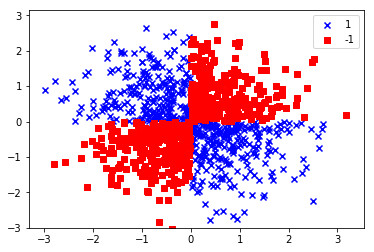

SVM with linear kernel has 63% accuracy
SVM with rbf kernel has 97% accuracy


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_xor = np.random.randn(1000, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

# "train" test split
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.33, random_state=42)

# SVM with linear kernel
svm_lin = SVC(kernel='linear', random_state=0, gamma=0.10, C=10.0)
svm_lin.fit(X_train, y_train)
svm_lin_pred = svm_lin.predict(X_test)
svm_lin_acc = metrics.accuracy_score(y_test, svm_lin_pred) * 100
print('SVM with linear kernel has %d%% accuracy' % svm_lin_acc)

# SVM with RBF kernel 
svm_rbf = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_rbf.predict(X_test)
svm_rbf_acc = metrics.accuracy_score(y_test, svm_rbf_pred) * 100
print('SVM with rbf kernel has %d%% accuracy' % svm_rbf_acc)

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

_Answer:_

- **Supervised learning** is performed with knowledge of what the desired outputs should be. The objective is to learn a function that best describes the relationship between the inputs and the outputs. In **unsupervised learning**, the outputs are not labeled. The aim is to discover commonalities in the feature space and so identify what the labels of the outputs should be. 


- K-NN is called a **lazy learning algorithm** because training only consists of storing the feature vectors and class labels of the training examples. The target function is learned locally, and generalization on the training data is delayed until classification is actually taking place. Lazy learning algorithms are utilized in online recommendation systems where the "training data" is continously updated. An algorithm like K-NN, which learns a new target function each time a recommendation query is made, will be able to categorize a dataset that is continously changing. 


- For training data set $X$, class labels $Y$, and unknown sample $x$, the **steps of the K-NN algorithm** are as follows:
    - Initialize a value for $K$
    - For $i = 1...n$ where $n$ is the total number of training examples, do:
        - Calculate the distance between the unknown sample $x$ and each row of the training data $X_{i}$ (e.g. Euclidean distance)
    - Compute the set $I$ containing the $k$-smallest distances calculated above
    - Return the majority label for $Y_{i}$, where $ i \in I$

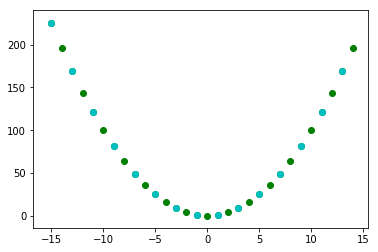

In [59]:
# SVM works, k-NN doesn't
fig, ax = plt.subplots()

x_1 = np.arange(-15, 15)
y_1 = x_1**2

x_2 = np.arange(-15, 15, 2)
y_2 = x_2**2

ax.scatter(x_1, y_1, c='g')
ax.scatter(x_2, y_2, c='c')

plt.show()

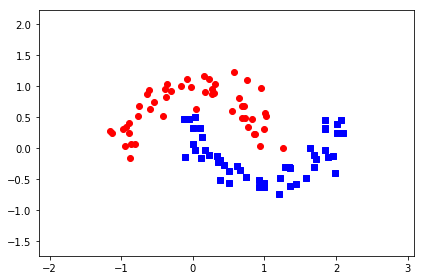

In [57]:
# k-NN classification works, linear SVC doesn't
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X, y = make_moons(n_samples=100, noise=0.15, random_state=0)

plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')

plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.tight_layout()
plt.show()

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [4]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import collections
from sklearn import metrics
from sklearn.model_selection import train_test_split


# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()

# convert iris_df into X and Y np arrays
X = np.array(iris_df.iloc[:, 0:4]) 
y = np.array(iris_df['target'])

# "train" test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# function to make k-NN prediction when query is made
def kNN_pred(X_train, y_train, x_test, k):
    
    # lists to hold euclidean distances, and target values
    euc_dists = []
    targets = []

    # iterate over each row of the training data and computer euclidean distances between sample and data
    for i in range(len(X_train)):
        euc_dists.append([np.sqrt(np.sum(np.square(x_test - X_train[i, :]))), i])
        
    # sort the list
    euc_dists = sorted(euc_dists)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = euc_dists[i][1]
        targets.append(y_train[index])

    # return majority label from list of targets
    return collections.Counter(targets).most_common(1)[0][0]

def kNN(X_train, y_train, X_test, preds, k):

    for i in range(len(X_test)):
        preds.append(kNN_pred(X_train, y_train, X_test[i, :], k))

# list of predictions 
preds = []

kNN(X_train, y_train, X_test, preds, 7)
preds = np.asarray(preds)

# evaluating accuracy
accuracy = metrics.accuracy_score(y_test, preds) * 100
print('k-NN from scratch has %d%% accuracy' % accuracy)

k-NN from scratch has 98% accuracy


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

_Answer:_


- Bagging and boosting are techniques used in **Ensemble Learning**. **Bagging** is an abbreviation for **Bootstrap aggregation** which describes a technique where a training set $D$ of size $n$ is sampled uniformly and with replacement forming $m$ new training sets $D_{i}$ of size $n'$. Effectively, each model in the ensemble is given equal weight. **Boosting** consists of incrementally building a classifier by training each new model with a focus on the training examples that previous models incorrectly classified. A use case for **bagging** would be if a single model in the ensemble is dominating, and overfitting the data as a result. A use case for **boosting** would be if a model is showing low performance and high bias.


- A **decision tree** is a decision support structure consisting of internal nodes that represent attribute tests, branches that represent outcomes, and a leaves which represent labels. 


- **Pros:**
    1. Easily interpretable  
    2. Very fast at testing time
    3. Handles irrelevant or noisy data well
 
 
- **Cons:** 
    1. Sensitive to pertubations in the dataset 
    2. Greedy (might not find best tree)
    3. Prone to overfitting


- **Random forest** is an ensemble learning method where many decision trees are created at training time and the class that is predicted is the mode of all the classes of the individual trees, or in the case of **random forest regression**, the prediction is the mean prediction of all the individual trees. 


- **Pros:**
    1. Maintains accuracy when large proportions of the data are missing
    2. Reduces variance
    3. Runs effeciently on large datasets 
    
    
- **Cons:**
    1. Not easily interpretable
    2. Bias towards higher number of levels when dealing with categorical data 
    3. Bias towards smaller groups when dealing with data that has groups of correlated features of equal relevance

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

_Answer:_


- **PCA** is an orthogonal linear transformation that transforms a dataset, which may contain correlated variables, into a dataset of linearly uncorrelated variables called principal components.


- Main steps of the PCA algorithm are as follows:
    1. Take the dataset of $d$-dimensional samples, ignoring class labels.
    2. Calculate the $d$-dimensional mean vector.
    3. Calculate the covariance matrix of the dataset.
    4. Compute the eigenvectors and eigenvalues of the dataset.
    5. Sort the eigenvectors by decreasing eigenvalue.
    6. Select the k-largest eigenvectors according to eigenvalue.
    7. Using the eigen vectors from step 6, construct a $d \times k$-dimensional matrix $W$. 
    8. Multiplying the data with $W$ linearly projects our matrix into a new vector subspace.


- Eigenvectors and Eigenvalues ensure that the projected matrix is uncorrelated and its variables are linearly independent.


- Subtraction by the mean is done to normalize the covariance matrix. This is important because PCA projects the original matrix into a vector subspace such that that variance is maximized. 


- PCA is a special case of an autoencoder that is limited to linear transformations. Autoencoders can project the data using non-linear encoders and decoders. 


- An autoencoder with a **single** linear transformation layer is equivalent to a PCA. 

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [5]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


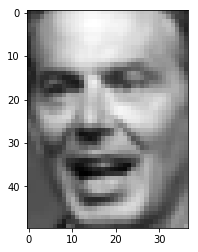

In [19]:
# plot an example image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

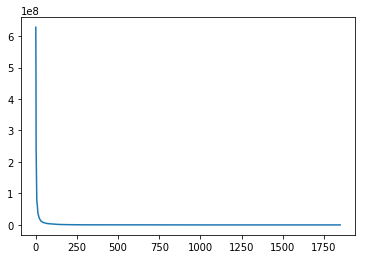

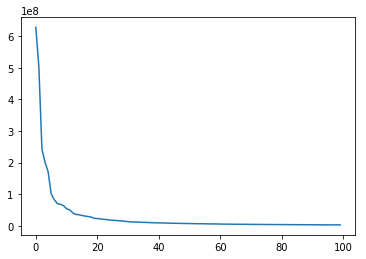

Shape of data before PCA: (1288, 1850)
Shape of data after PCA: (1288, 50)


In [20]:
X_average_row = np.average(X, axis=0)
X_bar = X - X_average_row
sigma = X_bar.T.dot(X_bar)

eigenvalues, _ = np.linalg.eig(sigma)

plt.plot(np.arange(len(eigenvalues)), eigenvalues)
plt.show()

plt.plot(np.arange(100), eigenvalues[:100])
plt.show()

pca = PCA(n_components=50)
pca.fit(X)

X_pca = pca.transform(X)
print("Shape of data before PCA: {0}".format(X.shape))
print("Shape of data after PCA: {0}".format(X_pca.shape))

In [29]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

pca = PCA(n_components=50)
pca.fit(X)

nn = MLPClassifier(hidden_layer_sizes=(1288,), batch_size=256, verbose=False, early_stopping=True)
X_transformed = pca.transform(X)
nn.fit(X_transformed, y)

print("MLP Traing Accuracy: {}".format(accuracy_score(nn.predict(X_transformed), y)))

MLP Traing Accuracy: 0.9704968944099379


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [ ]:
### your code below ###

